**Objetivo:** Estudar como as linhas espectrais da molécula de HCl na banda 2-0 se alargam em função da temperatura.


 **1.** Verificar se os espectros simulados pelo Hitran provê os mesmos coeficientes de auto-alargamento em função da pressão estudados durante a graduação.

 **2.** Simular espectros com as mesmas pressões, mas em temperaturas diferentes e verificar o que acontece com os coeficientes de auto-alargamento em cada temperatura
 
 **3.** Fixar uma pressão e verificar como esse coeficiente varia somente na temperatura.

 **4.** Estudar uma maneira de determinar a dependência entre pressão e temperatura.

 **5.** Modelar matematicamente em termos de temperatura e pressão

 **6.** Validar esse modelo em dados reais

 **7.** Desenvolver modelos de Machine Learning para processamento de espectros 

# Importando pacotes

In [1]:
from SpectraGenerator.spectragenerator import SpectraGenerator
from SpectraProcessing.spectraprocessing import branchNumber

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


HAPI version: 1.2.2.3
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

# Simulando espectros e processando espectros

Uma banda espectral é formada por linhas/raias espectrais, essas linhas são provenientes das transições de energias rotacionais em uma molécula. Essas transições podem ser categorizadas por Ramas denominadas por rama R, rama P ou  rama Q. No caso da banda 2-0 do HCl, temos somente as Ramas R e P. Cada linha, além da categorização da rama, tem também um número associado, para o HCl temos:

R = 0, 1, 2, 3, 4...

P = 1, 2, 3, 4...

Ao simularmos um espectro, é necessário aplicarmos um pré-processamento para organizarmos os dados obtidos. 

O ponto chave nessa tarefa é identificar corretamente o centro das linhas espectrais, dessa forma teremos sua localização absoluta.

**Tarefas:**

**1.** Identificar as raias espectrais

**2.** Categorizar as linhas em rama P ou rama R

**3.** Indicar a numeração de cada linha referente  a sua rama

**4.** Separar a raia do espectro.

**5.** Ajustar a linha utilizando o perfil de Voigt.

**6.** Armazenar todos os parâmetros obtidos do ajuste em um dataset.

**7.** Fazer isso para espectros em diferentes pressões e temperaturas.


Inicializando
Using SpectraGenerator/hitran_database

H35Cl
                     Lines parsed: 334
H37Cl
                     Lines parsed: 340
{'air': 0, 'self': 1}
3.454136 seconds elapsed for abscoef; nlines = 334


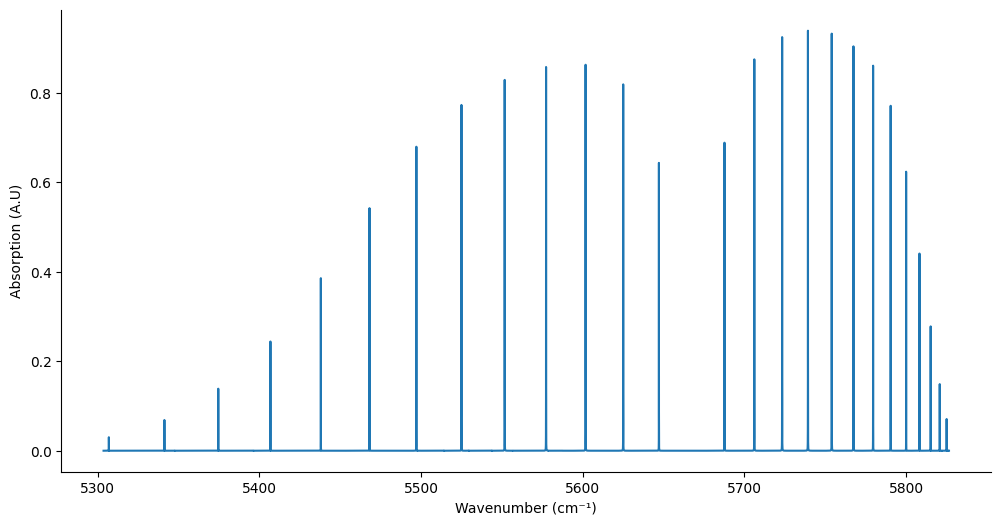

In [2]:
s = SpectraGenerator()

pressure = 0.050  #atm
temperature = 400 # Kelvin

optical_length = 10 #cm

s.simulateSpectra('H35Cl',{'air':0, 'self':1}, {'l':optical_length,'p':pressure,'T':temperature})

s.plot()

In [3]:
lines = branchNumber(s.spectra, findPeaksParams={'height':0},thresoldBranch=5665)

In [4]:
lines

,center,intensity,branch
0,5306.970654,0.030153,P
1,5341.321654,0.068708,P
2,5374.629654,0.138655,P
3,5406.878654,0.244189,P
4,5438.054654,0.385802,P
5,5468.143654,0.542385,P
6,5497.129654,0.679721,P
7,5524.999654,0.773158,P
8,5551.737654,0.829169,P
9,5577.330654,0.858039,P


In [8]:
lines.query('branch == "P"').sort_values(by='center',ascending=False)

,center,intensity,branch
12,5647.104654,0.643607,P
11,5625.027654,0.819152,P
10,5601.765654,0.863029,P
9,5577.330654,0.858039,P
8,5551.737654,0.829169,P
7,5524.999654,0.773158,P
6,5497.129654,0.679721,P
5,5468.143654,0.542385,P
4,5438.054654,0.385802,P
3,5406.878654,0.244189,P


<Axes: xlabel='center', ylabel='intensity'>

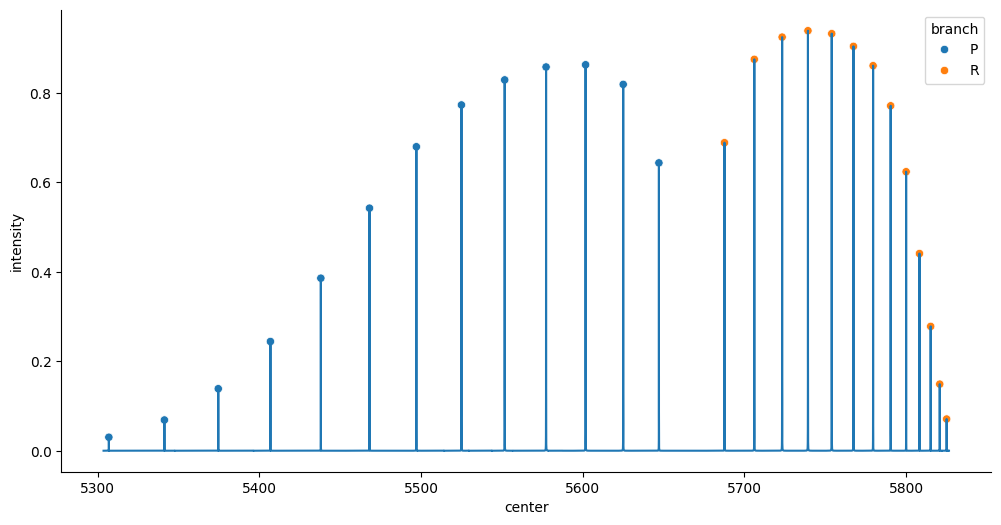

In [5]:
plt.plot(s.spectra['wavenumbers'],s.spectra['absorption'])
sns.scatterplot(x=lines['center'],y=lines['intensity'],hue=lines['branch'])